# Описание задачи

## Введение. Описание предметной области

Компания Tour & Travels предлагает своим клиентам пакет страхования путешествий.

Новый страховой пакет также включает покрытие Covid.

Компании необходимо знать, какие клиенты были бы заинтересованы в ее покупке, основываясь на истории своей базы данных.
Страхование было предложено некоторым клиентам в 2019 году, и данные были извлечены из показателей производительности/продаж пакета за этот период.

## Постановка задачи

Необходимо построить интеллектуальную модель, которая может предсказать, будет ли клиент заинтересован в покупке пакета страхования путешествий на основе определенных параметров, приведенных ниже в таблице.

## Данные

### Количество данных

- Объем данных (N) - 1987;
- Количество признаков (d) - 9;
- Количество классов (K) - 2.

### Описание данных

1. Id - уникальный идентификационный номер клиента;
2. Age - возраст клиента;
3. Employment Type - сектор, в котором работает клиент;
4. GraduateOrNot - является ли клиент выпускником колледжа или нет;
5. AnnualIncome - годовой доход клиента в индийских рупиях (округленный до ближайших 50 тысяч рупий);
6. FamilyMembers - количество членов семьи клиента;
7. ChronicDiseases - страдает ли клиент каким-либо серьезным заболеванием или состояниями, такими как диабет / высокое кровяное давление или астма и т. д;
8. FrequentFlyer - часто ли клиент покупал авиабилеты за последние 2 года (2017-2019);
9. EverTravelledAbroad - выезжал ли клиент когда-либо в другую страну (не обязательно пользуясь услугами компании);
10. TravelInsurance - купил ли клиент пакет страхования путешествий во время вводного предложения, проведенного в 2019 году.



Ссылка на датасет: [Travel insurance prediction data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).

# Лабораторная №1 (ДМЗ 3)

# Решение поставленной задачи

In [3]:
import pandas
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

## Чтение данных

In [4]:
data = pandas.read_csv("TravelInsurancePrediction.csv")

data.head(5)  # Визуально проверяем первые 5 строк данных

,Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
data.shape  # Проверяем размер таблицы

(1987, 10)

## Типы данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


- Пропущенные значения отсутствуют. Попробуем сымитировать такие значения в дальнейшем;
- Некоторые категориальные признаки имеют тип object. Необходимо выставить корректные типы данных для признаков;
- Некоторые признаки являются бинарными (Yes/No), но имеют тип object. Необходимо перевести данные в тип int64.

In [7]:
data = data.drop("Id", axis=1)  # Также избавимся от ненужного признака-идентификатора

In [8]:
# Переводим в категиориальный тип данных
data["Employment Type"] = data["Employment Type"].astype("category")

# Приводим Yes/No данные в бинарный (целочисленный) тип
data["GraduateOrNot"] = pandas.factorize(data["GraduateOrNot"])[0]
data["FrequentFlyer"] = pandas.factorize(data["FrequentFlyer"])[0]
data["EverTravelledAbroad"] = pandas.factorize(data["EverTravelledAbroad"])[0]

data.dtypes

Age                       int64
Employment Type        category
GraduateOrNot             int64
AnnualIncome              int64
FamilyMembers             int64
ChronicDiseases           int64
FrequentFlyer             int64
EverTravelledAbroad       int64
TravelInsurance           int64
dtype: object

## Имитируем пропущенные значения

In [9]:
np.random.seed(10)

remove_n = int(data.shape[0] * (data.shape[1] - 1) * 0.03)  # Удаляем 3% данных от общего числа всех признаков

drop_indices = np.random.choice(data.index, remove_n)
for idx in drop_indices:
    colIdx = random.randint(0, 7)  # Cтолбец с классом не трогаем
    data.loc[idx, data.columns[colIdx]] = None

In [10]:
data.head(15)  # Визуально проверяем None-элементы

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,NaN,Government Sector,0.0,400000.0,6.0,1.0,0.0,0.0,0
1,31.0,Private Sector/Self Employed,0.0,1250000.0,7.0,0.0,0.0,0.0,0
2,NaN,Private Sector/Self Employed,0.0,500000.0,4.0,1.0,0.0,0.0,1
3,28.0,Private Sector/Self Employed,0.0,700000.0,3.0,1.0,0.0,0.0,0
4,28.0,Private Sector/Self Employed,0.0,700000.0,8.0,1.0,1.0,NaN,0
5,25.0,Private Sector/Self Employed,1.0,1150000.0,4.0,0.0,NaN,0.0,0
6,31.0,Government Sector,0.0,1300000.0,4.0,0.0,0.0,0.0,0
7,31.0,Private Sector/Self Employed,0.0,1350000.0,3.0,0.0,1.0,1.0,1
8,28.0,Private Sector/Self Employed,0.0,1450000.0,6.0,1.0,1.0,1.0,1
9,33.0,Government Sector,0.0,800000.0,3.0,0.0,1.0,0.0,0


In [11]:
data.isna().sum()  # Число пропущенных значений

Age                    55
Employment Type        54
GraduateOrNot          58
AnnualIncome           69
FamilyMembers          65
ChronicDiseases        51
FrequentFlyer          66
EverTravelledAbroad    54
TravelInsurance         0
dtype: int64

In [12]:
data.count()

Age                    1932
Employment Type        1933
GraduateOrNot          1929
AnnualIncome           1918
FamilyMembers          1922
ChronicDiseases        1936
FrequentFlyer          1921
EverTravelledAbroad    1933
TravelInsurance        1987
dtype: int64

## Заполняем пропущенные значения медианными

In [13]:
category = data.describe(include=["category"])

# Исправляем категориальные признаки
data["Employment Type"].fillna(category["Employment Type"].top, inplace = True)

# Исправляем численные признаки
data["Age"].fillna(data["Age"].median(axis = 0), inplace = True)
data["AnnualIncome"].fillna(data["AnnualIncome"].median(axis = 0), inplace = True)
data["FamilyMembers"].fillna(data["FamilyMembers"].median(axis = 0), inplace = True)
data["ChronicDiseases"].fillna(data["ChronicDiseases"].median(axis = 0), inplace = True)

data["GraduateOrNot"].fillna(data["GraduateOrNot"].median(axis = 0), inplace = True)
data["FrequentFlyer"].fillna(data["FrequentFlyer"].median(axis = 0), inplace = True)
data["EverTravelledAbroad"].fillna(data["EverTravelledAbroad"].median(axis = 0), inplace = True)

# После имитации пропущенных значений, некоторые признаки стали типом float из-за наличия None-значений
# Возвращаем к исходному
data["Age"] = data["Age"].astype("int64")
data["AnnualIncome"] = data["AnnualIncome"].astype("int64")
data["FamilyMembers"] = data["FamilyMembers"].astype("int64")
data["ChronicDiseases"] = data["ChronicDiseases"].astype("int64")

data["GraduateOrNot"] = data["GraduateOrNot"].astype("int64")
data["FrequentFlyer"] = data["FrequentFlyer"].astype("int64")
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].astype("int64")

data["TravelInsurance"] = data["TravelInsurance"].astype("int64")

data.head(15)  # Визуально проверяем отсуствие None-элементов

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,29,Government Sector,0,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,0,1250000,7,0,0,0,0
2,29,Private Sector/Self Employed,0,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,0,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,0,700000,8,1,1,0,0
5,25,Private Sector/Self Employed,1,1150000,4,0,0,0,0
6,31,Government Sector,0,1300000,4,0,0,0,0
7,31,Private Sector/Self Employed,0,1350000,3,0,1,1,1
8,28,Private Sector/Self Employed,0,1450000,6,1,1,1,1
9,33,Government Sector,0,800000,3,0,1,0,0


In [14]:
data.isna().sum()  # Число пропущенных значений

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Больше пропущенных значений нет.

## Визуализация данных. Подсчёт основных характеристик

### Исследование количественных признаков

In [15]:
data.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.623050,0.142426,9.346502e+05,4.755410,0.269753,0.201309,0.185204,0.357323
std,2.874574,0.349574,3.718451e+05,1.585294,0.443943,0.401079,0.388561,0.479332
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


- Средний возраст клиентов - 29-30 лет;
- Только 15% клиентов имеют высшее образование;
- Средняя зарплата клиентов - 933014.6 рупий;
- Среднее число членов семьи клиента - 5;
- 27% клиентов имеют хронические заболевания;
- 20% пользовались услугами компании ранее;
- Только 18.5% клиентов бывали ранее в других странах;
- 36% клиентов приобретали предлагаемую страхову.

### Исследование категориальных признаков

In [16]:
data.describe(include=['category'])

,Employment Type
count,1987
unique,2
top,Private Sector/Self Employed
freq,1428


### Исследование корреляционной матрицы

In [17]:
corrMat = data.corr(numeric_only=True)

corrMat

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.018702,-0.018794,0.016331,-0.004322,-0.045516,-0.005988,0.059433
GraduateOrNot,-0.018702,1.000000,-0.095896,-0.016156,-0.023816,0.028837,-0.053428,-0.018398
AnnualIncome,-0.018794,-0.095896,1.000000,-0.016110,0.003134,0.347546,0.465066,0.390838
FamilyMembers,0.016331,-0.016156,-0.016110,1.000000,0.032983,-0.022304,-0.020428,0.086579
ChronicDiseases,-0.004322,-0.023816,0.003134,0.032983,1.000000,-0.036484,0.025485,0.017688
FrequentFlyer,-0.045516,0.028837,0.347546,-0.022304,-0.036484,1.000000,0.258214,0.225430
EverTravelledAbroad,-0.005988,-0.053428,0.465066,-0.020428,0.025485,0.258214,1.000000,0.420408
TravelInsurance,0.059433,-0.018398,0.390838,0.086579,0.017688,0.225430,0.420408,1.000000


<AxesSubplot:>

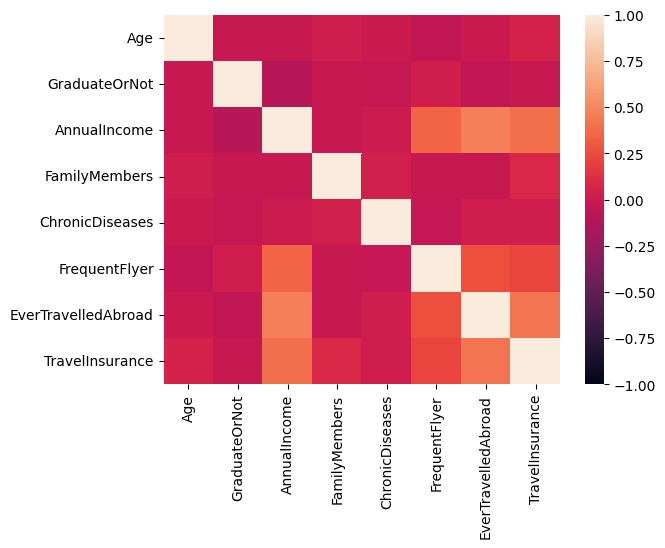

In [18]:
import seaborn

# Пробуем построить график корреляции по таблице
seaborn.heatmap(corrMat,
                vmin=-1.0,
                vmax=1.0)

Были замечены довольно светлые участки корреляции на графике: AnnualIncome-EverTravelledAbroad и EverTravelledAbroad-TravelInsurance. Изучим конкретные значения.

In [19]:
corrMat["EverTravelledAbroad"]["AnnualIncome"]

0.46506567456695724

Данное значение говорит о корреляционной зависимости данных параметров.
EverTravelledAbroad - выезжал ли клиент когда-либо в другую страну.
AnnualIncome - доход клиента.

Эта зависимость объясняется довольно просто. Очевидно, чем больше доход у человека, тем больше свободных у него средств для осуществления путешествий в другие страны.

In [20]:
corrMat["EverTravelledAbroad"]["TravelInsurance"]

0.42040808754920983

Данное значение также говорит о корреляционной зависимости.
TravelInsurance - купил ли клиент пакет страхования путешествий.

Эта зависимость объясняется корреляционной зависимостью выше. Маловероятно, что человек, небывавший в других странах, приобретет пакет страхования.

Проверим также корреляционную зависимость TravelInsurance и AnnualIncome.

In [21]:
corrMat["TravelInsurance"]["AnnualIncome"]

0.3908377869758462

Значение, конечно, меньше, но корреляционная зависимость всё же присутвует. Чем выше доход у человека, тем выше его обеспокоенность за собственную жизнь - тем чаще он покупает пакет страхования.

In [22]:
corrMat["FrequentFlyer"]["AnnualIncome"]

0.3475461974256709

Здесь также можно увидеть очевидную связь параметров.

FrequentFlyer - часто ли клиент покупал авиабилеты за последние 2 года.

Данная корреляция обуславливается связью EverTravelledAbroad и AnnualIncome параметров

In [23]:
print(corrMat["TravelInsurance"]["ChronicDiseases"])
print(corrMat["TravelInsurance"]["Age"])

0.017687785259168066
0.05943253329732131


К моему удивлению, корреляционных зависимостей между данными параметрами не обнаружилось.

## Сбалансированность классов

0.6426774031202819
0.3573225968797182


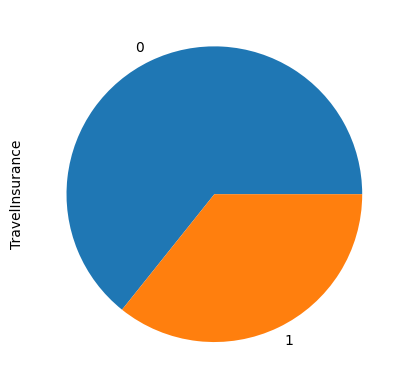

In [24]:
import collections

print(collections.Counter(data["TravelInsurance"])[0]/data.shape[0])
print(collections.Counter(data["TravelInsurance"])[1]/data.shape[0])

data["TravelInsurance"].value_counts().plot.pie();

Классы несбалансированны. Соотношение составляет 65 к 35.

## Дополнительная обработка категориальных признаков

Yes/No признаки в начале были отформатированы как бинарные. Остался признак Employment Type, который также является бинарным, можно перевести его в тип int64.

In [25]:
data["Employment Type"] = pandas.factorize(data["Employment Type"])[0]

data.head(5)  # Визуально проверяем форматирование

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,29,0,0,400000,6,1,0,0,0
1,31,1,0,1250000,7,0,0,0,0
2,29,1,0,500000,4,1,0,0,1
3,28,1,0,700000,3,1,0,0,0
4,28,1,0,700000,8,1,1,0,0


## Нормализация данных

Нормализация позволяет значительно повысить скорость сходимости алгоритма обучения нейронной сети. Если не провести нормализацию, то входные данные будут оказывать дополнительное влияние на нейрон, что может привести к неверным решениям.

В целях повышения точности классификации, нормализуем данные нашей таблицы.

In [26]:
# Исключаем столбец классов из данных
classes = data["TravelInsurance"]
data = data.drop("TravelInsurance", axis=1)

# Стандартизируем
normalized = data - data.mean(axis=0)
normalized = normalized / data.std(axis=0)
normalized.head(5)  # Визуально проверяем нормализацию

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,-0.216745,-1.597897,-0.407426,-1.437830,0.785085,1.644909,-0.501917,-0.476641
1,0.479010,0.625507,-0.407426,0.848068,1.415882,-0.607630,-0.501917,-0.476641
2,-0.216745,0.625507,-0.407426,-1.168901,-0.476511,1.644909,-0.501917,-0.476641
3,-0.564623,0.625507,-0.407426,-0.631043,-1.107309,1.644909,-0.501917,-0.476641
4,-0.564623,0.625507,-0.407426,-0.631043,2.046680,1.644909,1.991357,-0.476641


In [27]:
normalized.describe()  # Проверяем значения среднеквадратичного отклонения после нормализации

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03
mean,-3.298821e-16,5.363936e-17,7.017816e-17,-2.503170e-17,1.001268e-16,-8.939894e-18,1.340984e-17,-4.648745e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.608256e+00,-1.597897e+00,-4.074263e-01,-1.706760e+00,-1.738107e+00,-6.076302e-01,-5.019174e-01,-4.766408e-01
25%,-5.646228e-01,-1.597897e+00,-4.074263e-01,-8.999721e-01,-4.765111e-01,-6.076302e-01,-5.019174e-01,-4.766408e-01
50%,-2.167451e-01,6.255075e-01,-4.074263e-01,-9.318457e-02,1.542867e-01,-6.076302e-01,-5.019174e-01,-4.766408e-01
75%,8.268879e-01,6.255075e-01,-4.074263e-01,8.480675e-01,7.850846e-01,1.644909e+00,-5.019174e-01,-4.766408e-01
max,1.870521e+00,6.255075e-01,2.453196e+00,2.327178e+00,2.677478e+00,1.644909e+00,1.991357e+00,2.096960e+00


## Тестовая и тренировочная выборки

Разбивать датасет будем по правилу 80 на 20.

In [28]:
from sklearn.model_selection import train_test_split

X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(normalized,
                                                                        classes,
                                                                        test_size = 0.2,
                                                                        random_state = np.random.RandomState(0))

print("X", "train:", X_train_data.shape, "test:", X_test_data.shape)
print("Y", "train:", len(Y_train_data), "test:", len(Y_test_data))

X train: (1589, 8) test: (398, 8)
Y train: 1589 test: 398


## Классификатор ближайших соседей

In [27]:
%%time
from sklearn.neighbors import KNeighborsClassifier

error_list = list()

# Проходимся по 1-30 соседям
for k in range(1, 31):
    kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train_data, Y_train_data)
    X_tr_pred = kNN.predict(X_train_data)
    X_te_pred = kNN.predict(X_test_data)
    trError   = np.mean(Y_train_data != X_tr_pred)
    testError = np.mean(Y_test_data  != X_te_pred)
    error_list.append(testError)
    print("k = ", k, ", error on train =", trError)
    print("k = ", k, ", error on test  =", testError)
    print("/********************************************/")

k =  1 , error on train = 0.07929515418502203
k =  1 , error on test  = 0.2964824120603015
/********************************************/
k =  2 , error on train = 0.14537444933920704
k =  2 , error on test  = 0.22110552763819097
/********************************************/
k =  3 , error on train = 0.14977973568281938
k =  3 , error on test  = 0.24371859296482412
/********************************************/
k =  4 , error on train = 0.1617369414726243
k =  4 , error on test  = 0.20351758793969849
/********************************************/
k =  5 , error on train = 0.17117684078036502
k =  5 , error on test  = 0.22110552763819097
/********************************************/
k =  6 , error on train = 0.17684078036500944
k =  6 , error on test  = 0.21105527638190955
/********************************************/
k =  7 , error on train = 0.18187539332913782
k =  7 , error on test  = 0.21105527638190955
/********************************************/
k =  8 , error on train = 0.1

In [28]:
print("Наилучшая точность на тестовой выборке:", 1 - min(error_list))
print("При k =", error_list.index(min(error_list)) + 1)

Наилучшая точность на тестовой выборке: 0.8090452261306533
При k = 10


## SVM.SVC классификатор

In [29]:
%%time
from sklearn.svm import SVC

SVC = SVC(decision_function_shape='ovo').fit(X_train_data, Y_train_data)
X_tr_pred = SVC.predict(X_train_data)
X_te_pred = SVC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8187539332913782
Показатель точности на тестовой выборке: 0.8090452261306533
CPU times: total: 219 ms
Wall time: 229 ms


## Gradient boosting классификатор

In [30]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=15, max_depth=6).fit(X_train_data, Y_train_data)
X_tr_pred = GBC.predict(X_train_data)
X_te_pred = GBC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8470736312146003
Показатель точности на тестовой выборке: 0.8040201005025126
CPU times: total: 62.5 ms
Wall time: 68 ms


## Классификатор дерева решений

In [38]:
%%time
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier().fit(X_train_data, Y_train_data)
X_tr_pred = DTC.predict(X_train_data)
X_te_pred = DTC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.9282567652611705
Показатель точности на тестовой выборке: 0.728643216080402
CPU times: total: 15.6 ms
Wall time: 6 ms


## Случайный лес

In [42]:
%%time
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=np.random.RandomState(0)).fit(X_train_data, Y_train_data)
X_tr_pred = RFC.predict(X_train_data)
X_te_pred = RFC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8414096916299559
Показатель точности на тестовой выборке: 0.8165829145728644
CPU times: total: 46.9 ms
Wall time: 21 ms


## Выводы по классификациям

Классификатор ближайших соседей: наибольший показатель точности в рамках данного классификатора составил ~79% при k = 10.

Наибольший показатель точности среди всех использованных классификаторах показал классификатор RandomForestClassifier (случайный лес). Значение составило ~82%.

Эмпирическим путём для данного классификатора были подобраны следующие параметры:
- n_estimators = 10;
- max_depth = 6.

# Выводы по проделанной работе

В ходе проделанной работы:
- Был проведён анализ характеристик по входным данным:
    - Классы выборки оказались несбалансированными (65:35);
    - Были выявлены и объяснены корреляционные зависимости между различными параметрами;
    - Были составлены таблицы по основным характеристикам.
- Был сымитирован (и исправлен) случай пропущенных значений;
- Входные данные были подготовлены (т.е. отформатированы и нормализованы) для подачи их на вход алгоритмам классификации;
- Готовые данные были разделены на тренировочную и тестовую выборки в соостветсвии с правилом 80 на 20;
- Произведены эксперименты с разными алгоритами классификации над входными данными.

В результате экспериметов:
- Найден оптимальный параметр и наилучший показатель точности алгоритма kNN;
- Был найден алгоритм, незначительно увеличивающий показатель точности в сравнении с kNN, но сильно уступающий в результатах замера времени.

# Лабораторная 2 (ДМЗ 6)

Загрузка, визуальная проверка и обработка входных данных представлена в начале документа. Возьмём из предыдущий работы подготовленные наборы тренировочных и тестовых данных X_train_data, X_test_data, Y_train_data, Y_test_data.

In [187]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

## Подбор гиперпараметров

### Подберем оптимальное значение нейронов (1 скрытый слой)

In [233]:
neurons = range(5, 100, 5)
test_err, train_err, train_acc, test_acc = [], [], [], []

for n in neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes = (n,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train_data, Y_train_data)

    y_train_pred = mlp_model.predict(X_train_data)
    y_test_pred = mlp_model.predict(X_test_data)

    train_err.append(np.mean(Y_train_data != y_train_pred))
    test_err.append(np.mean(Y_test_data != y_test_pred))
    train_acc.append(accuracy_score(Y_train_data, y_train_pred))
    test_acc.append(accuracy_score(Y_test_data, y_test_pred))
    
    print("Нейронов: ", n)

Нейронов:  5
Нейронов:  10
Нейронов:  15
Нейронов:  20
Нейронов:  25
Нейронов:  30
Нейронов:  35
Нейронов:  40
Нейронов:  45
Нейронов:  50
Нейронов:  55
Нейронов:  60
Нейронов:  65
Нейронов:  70
Нейронов:  75
Нейронов:  80
Нейронов:  85
Нейронов:  90
Нейронов:  95


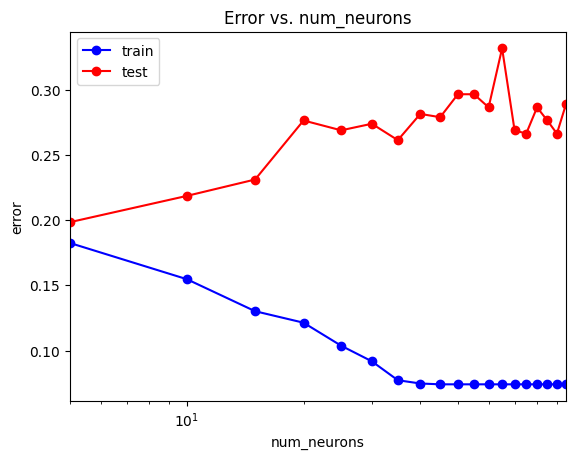

In [234]:
plt.semilogx(neurons, train_err, 'b-o', label = 'train')
plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Error vs. num_neurons')
plt.xlabel('num_neurons')
plt.ylabel('error')
plt.legend()

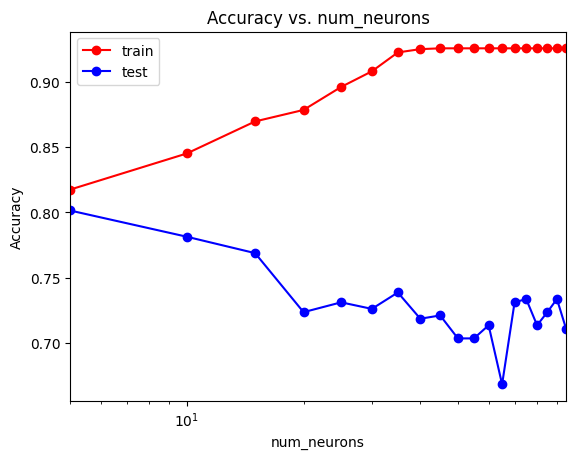

In [235]:
plt.semilogx(neurons, train_acc, 'r-o', label = 'train')
plt.semilogx(neurons, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Accuracy vs. num_neurons')
plt.xlabel('num_neurons')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [236]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.07426054122089365
Минимальная ошибка на тестовой выборке:  0.1984924623115578


Оптимальное количество нейронов:

In [237]:
n_opt = neurons[np.argmin(test_err)]
print(n_opt)

5


In [238]:
print("Оптимальное количество нейронов: ", n_opt)

Оптимальное количество нейронов:  5


### Подберем оптимальное значение параметра регуляризации alpha при оптимальном числе нейронов (1 скрытый слой)

In [239]:
alpha_arr = np.logspace(-3, 2, 21)

test_err, train_err, train_acc, test_acc = [], [], [], []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (n_opt,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train_data, Y_train_data)

    y_train_pred = mlp_model.predict(X_train_data)
    y_test_pred = mlp_model.predict(X_test_data)

    train_err.append(np.mean(Y_train_data != y_train_pred))
    test_err.append(np.mean(Y_test_data != y_test_pred))
    train_acc.append(accuracy_score(Y_train_data, y_train_pred))
    test_acc.append(accuracy_score(Y_test_data, y_test_pred))

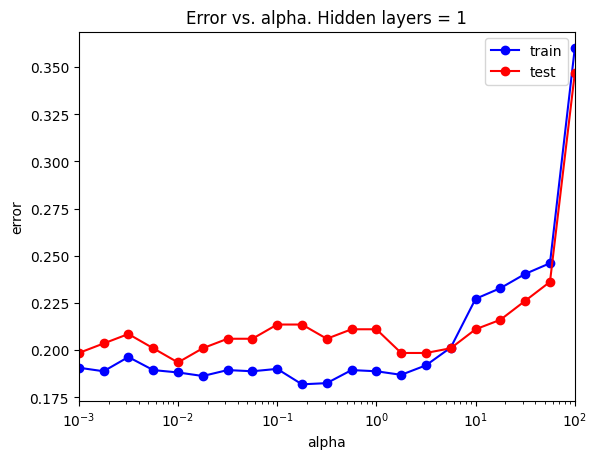

In [241]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha. Hidden layers = 1')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

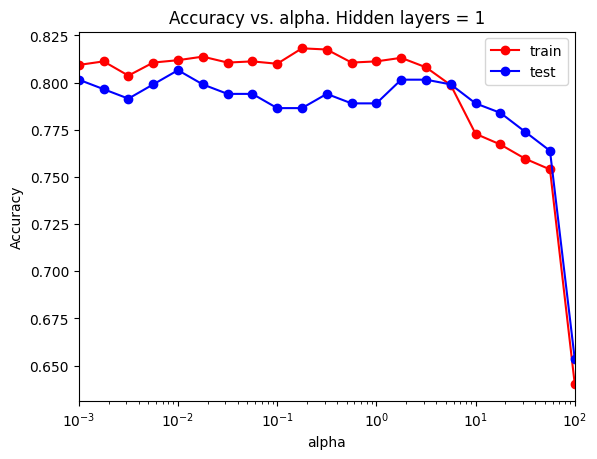

In [243]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha. Hidden layers = 1')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [244]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.18187539332913782
Минимальная ошибка на тестовой выборке:  0.1934673366834171


In [246]:
alpha_opt = alpha_arr[np.argmin(test_err)]
print(alpha_opt)

0.01


In [249]:
print("Оптимальное значение alpha: ", alpha_opt)

Оптимальное значение alpha:  0.01


### Подберем оптимальное значение нейронов (2 скрытых слоя)

In [250]:
neurons1 = range(5, 100, 5)
neurons2 = range(5, 100, 5)

shape = np.zeros((len(neurons1), len(neurons2)))

test_err, train_err, train_acc, test_acc = np.copy(shape), np.copy(shape), np.copy(shape), np.copy(shape)

for n1 in range(len(neurons1)):
    for n2 in range(len(neurons)):
        mlp_model = MLPClassifier(hidden_layer_sizes = (neurons1[n1], neurons2[n2]), 
                                  solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(X_train_data, Y_train_data)

        y_train_pred = mlp_model.predict(X_train_data)
        y_test_pred = mlp_model.predict(X_test_data)

        train_err[n1][n2] = (np.mean(Y_train_data != y_train_pred))
        test_err[n1][n2] = (np.mean(Y_test_data != y_test_pred))
        train_acc[n1][n2] = (accuracy_score(Y_train_data, y_train_pred))
        test_acc[n1][n2] = (accuracy_score(Y_test_data, y_test_pred))


In [251]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

n_opt_1 = -1
n_opt_2 = -1
for n1 in range(len(neurons1)):
    for n2 in range(len(neurons2)):
        if (test_err[n1][n2] == min_test_err):
            print("Оптимальное количество нейронов для первого слоя: ", neurons1[n1])
            print("Оптимальное количество нейронов для второго слоя: ", neurons2[n2])
            n_opt_1 = neurons1[n1]
            n_opt_2 = neurons2[n2]
            break

Минимальная ошибка на обучающей выборке:  0.07426054122089365
Минимальная ошибка на тестовой выборке:  0.19597989949748743
Оптимальное количество нейронов для первого слоя:  80
Оптимальное количество нейронов для второго слоя:  10


### Подберем оптимальное значение параметра регуляризации alpha при оптимальных количествах нейронов (2 скрытых слоя)

In [252]:
alpha_arr = np.logspace(-3, 2, 21)

test_err, train_err, train_acc, test_acc = [], [], [], []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (n_opt_1, n_opt_2), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train_data, Y_train_data)

    y_train_pred = mlp_model.predict(X_train_data)
    y_test_pred = mlp_model.predict(X_test_data)

    train_err.append(np.mean(Y_train_data != y_train_pred))
    test_err.append(np.mean(Y_test_data != y_test_pred))
    train_acc.append(accuracy_score(Y_train_data, y_train_pred))
    test_acc.append(accuracy_score(Y_test_data, y_test_pred))

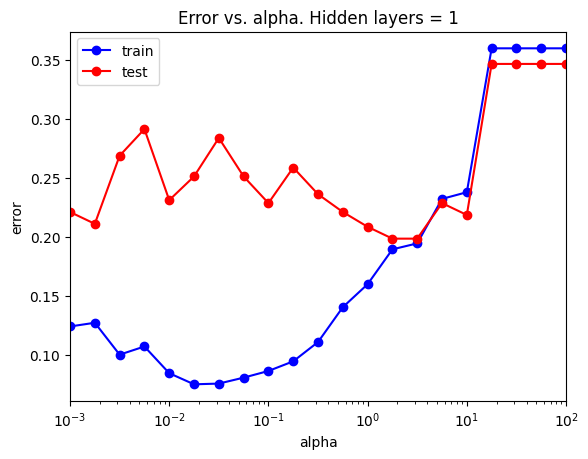

In [253]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha. Hidden layers = 1')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

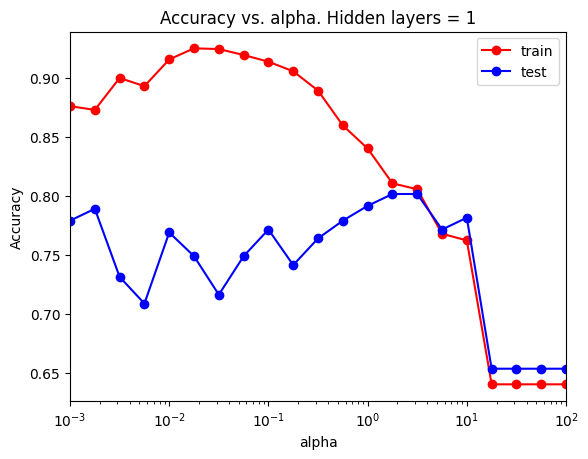

In [254]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha. Hidden layers = 1')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [255]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.07488986784140969
Минимальная ошибка на тестовой выборке:  0.1984924623115578


In [256]:
alpha_opt = alpha_arr[np.argmin(test_err)]
print(alpha_opt)

1.7782794100389228


In [257]:
print("Оптимальное значение alpha: ", alpha_opt)

Оптимальное значение alpha:  1.7782794100389228


# Выводы по проделанной работе

Примечание: для оценки полученных результатов точности будем сравнивать их с наибольшим показателем точности, полученным в предыдущей работе при использовании алгоритма "Случайный лес" (0.816).

0. Проделана работа по обучению MLPClassifier классификатора на основе входных данных и работа по подбору гиперпараметров;
1. Подбор оптимального параметра регуляризации alpha (1 скрытый слой):
    1. Найдено оптимальное число нейронов, равное 1;
    2. Найдено оптимальное значение alpha, равное 0.01;
    2. Значение ошибки на тестовой выборке при этом составило 0.193 (точность = 0.807). Точность меньше на 0.9%.
    3. Переобучение не наблюдается: при возрастании alpha значение ошибки также возрастает, как на тестовой, так и на обучающей выборке.
2. Подбор оптимального параметра регуляризации alpha (2 скрытых слоя):
    1. Найдено оптимальное число нейронов, равное 80 и 10 для первого и второго слоев соответственно;
    2. Найдено оптимальное значение alpha, равное 1.778;
    2. Значение ошибки на тестовой выборке при этом составило 0.198 (точность = 0.802). Точность меньше на 1.4%.
    3. Переобучение не наблюдается;
    4. Вероятно имеется проблема недообучения.

Вероятные причины, из-за которых не удалось получить бОльшее значение точности при использовании многослойной сети:
1. Объём входных данных составляет 1987, из которых \~3% было удалено из-за имитации пропущенных значений (\~1918). Кроме того, для обучения сети, данные были разделены в соотношении 80 на 20. Т.о. размер обучающей выборки составил \~1535. В сравнении со многими популярными датасетами, данное значение относительно невилко, что рождает проблему недостаточности входных данных для обучения;
2. Некоторые признаки входных данных имеют корреляционную зависимость, что может влиять на модель МО. Например, приводить к неустойчивости коэффициентов.

# ПРИМЕЧАНИЕ
## Первая работа не была сдана в срок. Пожалуйста, если есть такая возможность, перепроверьте с: